In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
csv = [pd.read_csv(f"N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]


In [93]:
ice = pd.concat(csv, axis=0, ignore_index=True)
ice.shape

(541, 6)

In [94]:
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20 , np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
ice.interpolate(inplace=True)
grouped_mean = ice.groupby(['year','mo','data-type','region']).mean().reset_index()

C:\Users\balak\AppData\Local\Temp\ipykernel_4560\1919866895.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ice.interpolate(inplace=True)


In [95]:
ice.isna().sum()

year         0
mo           0
data-type    0
region       0
extent       0
area         0
dtype: int64

In [96]:

grouped_mean.isna().sum()

year         0
mo           0
data-type    0
region       0
extent       0
area         0
dtype: int64

In [97]:
grouped_mean.tail(12)

,year,mo,data-type,region,extent,area
529,2022,12,Goddard,N,11.89,10.27
530,2023,1,NRTSI-G,N,13.35,11.83
531,2023,2,NRTSI-G,N,14.18,12.57
532,2023,3,NRTSI-G,N,14.44,12.87
533,2023,4,NRTSI-G,N,13.99,12.50
534,2023,5,NRTSI-G,N,12.83,11.02
535,2023,6,NRTSI-G,N,10.96,8.71
536,2023,7,NRTSI-G,N,8.18,5.54
537,2023,8,NRTSI-G,N,5.57,3.52
538,2023,9,NRTSI-G,N,4.37,2.79


In [98]:
reg = grouped_mean.groupby('year')[['extent', 'area']].mean().reset_index()

In [99]:
reg.head()

,year,extent,area
0,1978,12.660000,9.970000
1,1979,12.350000,9.441667
2,1980,12.348333,9.388333
3,1981,12.146667,9.146667
4,1982,12.467500,9.525000


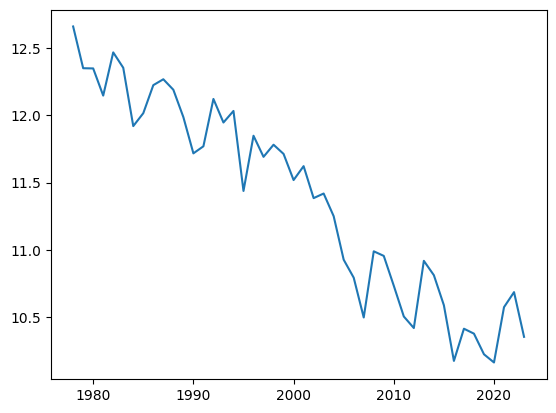

In [100]:
plt.plot(reg['year'],reg['extent'])

In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(reg[['year']],reg['extent'])  


LinearRegression()

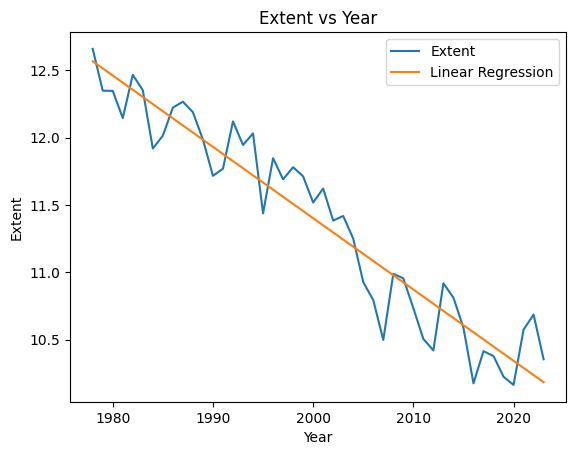

In [102]:
plt.plot(reg['year'],reg['extent'])
plt.plot(reg['year'],model.predict(reg[['year']]))
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Extent vs Year')
plt.legend(['Extent','Linear Regression'])



In [103]:
ice.head()

,year,mo,data-type,region,extent,area
0,1979,1,Goddard,N,15.41,12.41
1,1980,1,Goddard,N,14.86,11.94
2,1981,1,Goddard,N,14.91,11.91
3,1982,1,Goddard,N,15.18,12.19
4,1983,1,Goddard,N,14.94,12.01


In [104]:
ice.rename(columns={'mo': 'month'}, inplace=True)


In [105]:
data = ice[['year','month','extent']]


In [106]:
data['day'] = 1

C:\Users\balak\AppData\Local\Temp\ipykernel_4560\3507435127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = 1


In [107]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])



C:\Users\balak\AppData\Local\Temp\ipykernel_4560\3271098582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data[['year', 'month', 'day']])


In [108]:
data.set_index('date', inplace=True)


In [109]:
data.drop(['year', 'month', 'day'], axis=1, inplace=True)

C:\Users\balak\AppData\Local\Temp\ipykernel_4560\2733728666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['year', 'month', 'day'], axis=1, inplace=True)


In [110]:
data.sort_index(inplace=True)


C:\Users\balak\AppData\Local\Temp\ipykernel_4560\2910607828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace=True)


In [111]:
data.isna().sum()

extent    0
dtype: int64

<Axes: title={'center': 'Extent vs Date'}, xlabel='date'>

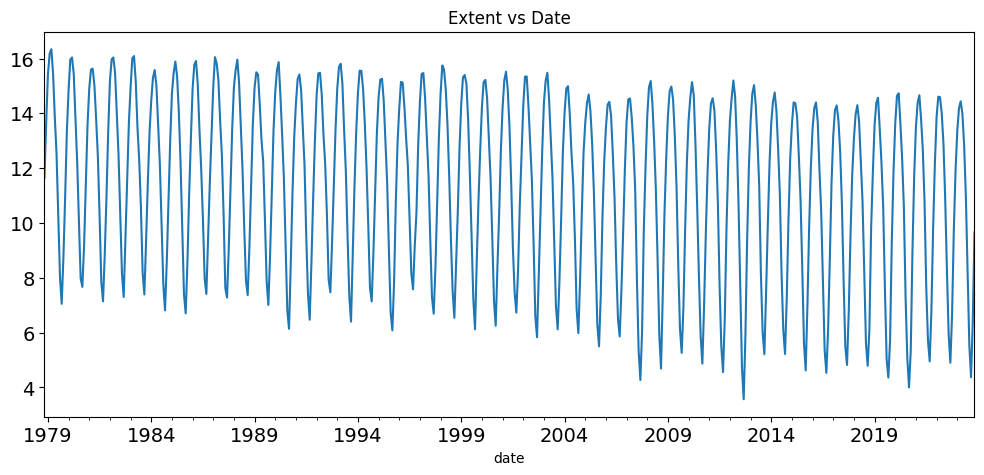

In [112]:
data['extent'].plot(figsize=(12, 5), title='Extent vs Date', fontsize=14)

In [113]:
from pmdarima import auto_arima



In [114]:
fit = auto_arima(data['extent'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2133.820, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1612.594, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1673.116, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2131.822, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1268.925, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1257.062, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1222.348, Time=0.17 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1128.695, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=825.486, Time=1.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=931.690, Time=0.73 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=831.678, Time=0.38 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] intercept
Tota

In [118]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [119]:
train = data.iloc[:int(len(data)*0.95)]
test = data.iloc[int(len(data)*0.95):]


In [120]:
model = ARIMA(train['extent'], order=(5, 1, 1))
model = model.fit()
model.summary()

c:\Users\balak\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\balak\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\balak\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 extent   No. Observations:                  513
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -388.117
Date:                Wed, 03 Jan 2024   AIC                            790.234
Time:                        16:26:13   BIC                            819.902
Sample:                    11-01-1978   HQIC                           801.864
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4900      0.040     37.096      0.000       1.411       1.569
ar.L2         -1.0421      0.077    -13.553      0.000      -1.193      -0.891
ar.L3          0.1088      0.103      1.057      0.290      -0.093       0.311
ar.L4          0.3000      0.099      3.034      0.002       0.106       0.494
ar.L5         -0.4207      0.051     -8.299      0.000      -0.520      -0.321
ma.L1         -0.9603      0.014    -67.583      0.000      -0.988      -0.932
sigma2         0.2624      0.019     13.460      0.000       0.224       0.301
===================================================================================
Ljung-Box (L1) (Q):                   9.35   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.00   Prob(JB):                         0.39
Heteroskedasticity (H):               1.39   Skew:                             0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
predictions = model.forecast(steps=len(test))


In [122]:
predictions

2021-08-01     5.326680
2021-09-01     4.941563
2021-10-01     6.343337
2021-11-01     8.447922
2021-12-01    10.696525
2022-01-01    12.868093
2022-02-01    14.571968
2022-03-01    15.134042
2022-04-01    14.221408
2022-05-01    12.166796
2022-06-01     9.715333
2022-07-01     7.556362
2022-08-01     6.160406
2022-09-01     5.831123
2022-10-01     6.689205
2022-11-01     8.542572
2022-12-01    10.863454
2023-01-01    12.971947
2023-02-01    14.292568
2023-03-01    14.510570
2023-04-01    13.605185
2023-05-01    11.828902
2023-06-01     9.658691
2023-07-01     7.687522
2023-08-01     6.455507
2023-09-01     6.285841
2023-10-01     7.198625
2023-11-01     8.923017
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: title={'center': 'Extent vs Date'}, xlabel='date'>

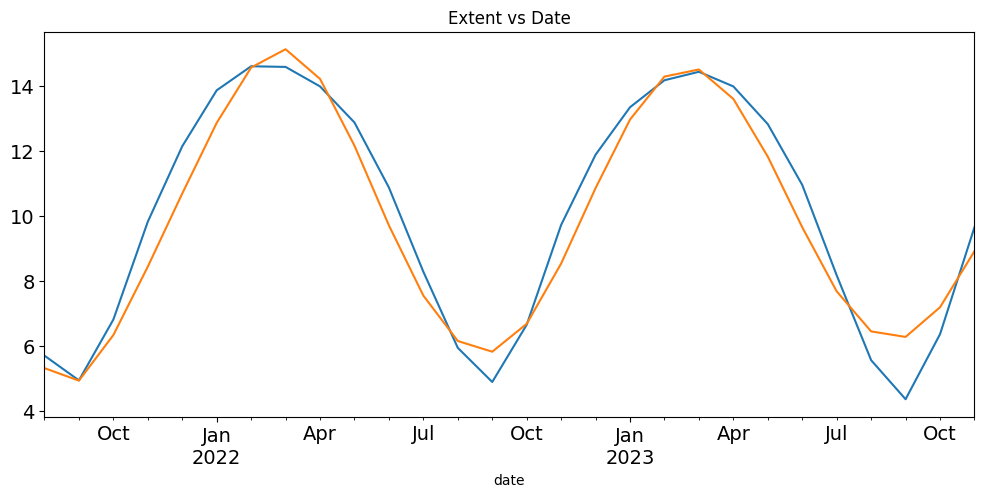

In [125]:
test['extent'].plot(figsize=(12, 5), title='Extent vs Date', fontsize=14)
predictions.plot()